In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 

In [11]:
df = pd.read_csv('GOOG.csv') 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [12]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
4857,2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19216500


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [14]:
df.shape

(4858, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4858 entries, 2004-08-19 to 2023-12-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4858 non-null   float64
 1   High       4858 non-null   float64
 2   Low        4858 non-null   float64
 3   Close      4858 non-null   float64
 4   Adj Close  4858 non-null   float64
 5   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 265.7 KB


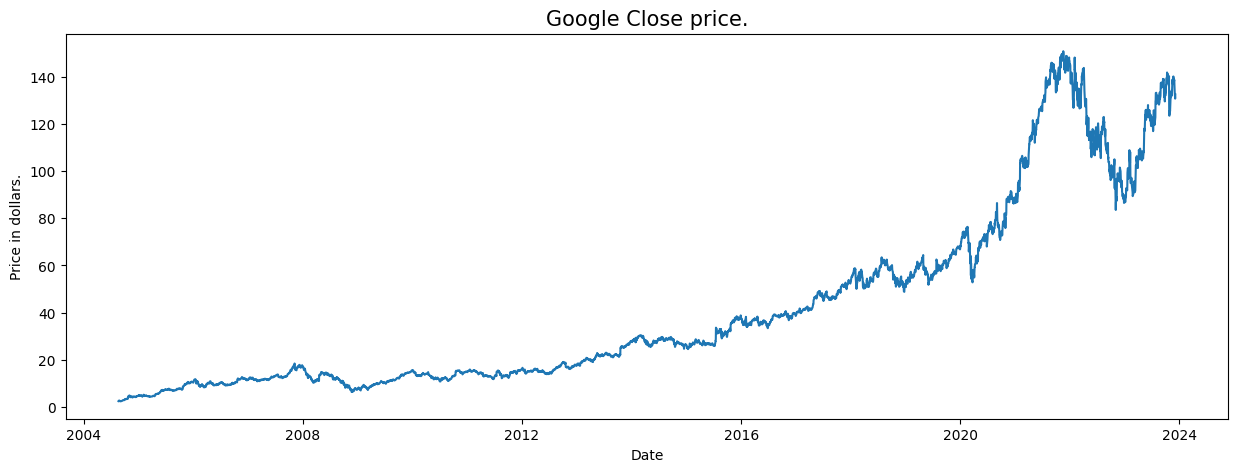

In [16]:
plt.figure(figsize=(15,5)) 
plt.plot(df['Close']) 
plt.title('Google Close price.', fontsize=15) 
plt.ylabel('Price in dollars.') 
plt.xlabel('Date')
plt.show()

In [17]:
df = df.drop(['Adj Close'], axis=1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
features = df[['Open', 'High', 'Low']] 
target = df['Close'] 

scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

features = scaler_features.fit_transform(features)
target = target.values.reshape(-1, 1)
target = scaler_target.fit_transform(target)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_test.shape) 


(4372, 3) (486, 3)


In [19]:
target

array([[5.54588186e-05],
       [1.39474206e-03],
       [1.57790459e-03],
       ...,
       [8.82679683e-01],
       [8.64530737e-01],
       [8.76405091e-01]])

In [20]:
Y_train.shape

(4372, 1)

In [21]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics

model=XGBRegressor()

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [23]:
print('Training R^2 : ', metrics.r2_score(Y_train, y_train_pred))
print('Testing R^2 : ', metrics.r2_score(Y_test, y_test_pred))

Training R^2 :  0.9998940724702672
Testing R^2 :  0.9997714012439308


In [24]:
print(y_train_pred)

[0.06519619 0.03305666 0.70555377 ... 0.8152863  0.02026843 0.05569521]


In [25]:
arr = np.array([[130.369, 133.539, 129.729]])
arr_scaled = scaler_features.transform(arr)

prediction = model.predict(arr_scaled)
print("Prediction:", scaler_target.inverse_transform(prediction.reshape(-1, 1)))

Prediction: [[132.51437]]


C:\Users\vc\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [26]:
model.save_model('stock_predictor.model')

C:\Users\vc\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:04:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
